In [64]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb

    La respuesta de un sistema al impulso unitario, en el dominio analógico, es h_a (t)=e^(-αt) sin(2πFt)u(t), donde u(t) es el escalón unitario. Determina, en el dominio de t-discreto, cuál será la respuesta del sistema cuando la entrada sea un pulso de la forma  x_a (t)=if(0≤t<2,1,0) si se muestrean las señales a razón de 100 muestras por segundos.  
    Toma α=1/2,F=2.5Hz.

    1. Graficar juntas las señales analógicas y las muestreadas.
    
    2. Calcula la convolución en el dominio de t-discreto y muestra que ambas respuestas coinciden.

    En el dominio de t-continuo la convolución es:

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-03 a la(s) 16.12.19.png">

- - -

### Apartado 1

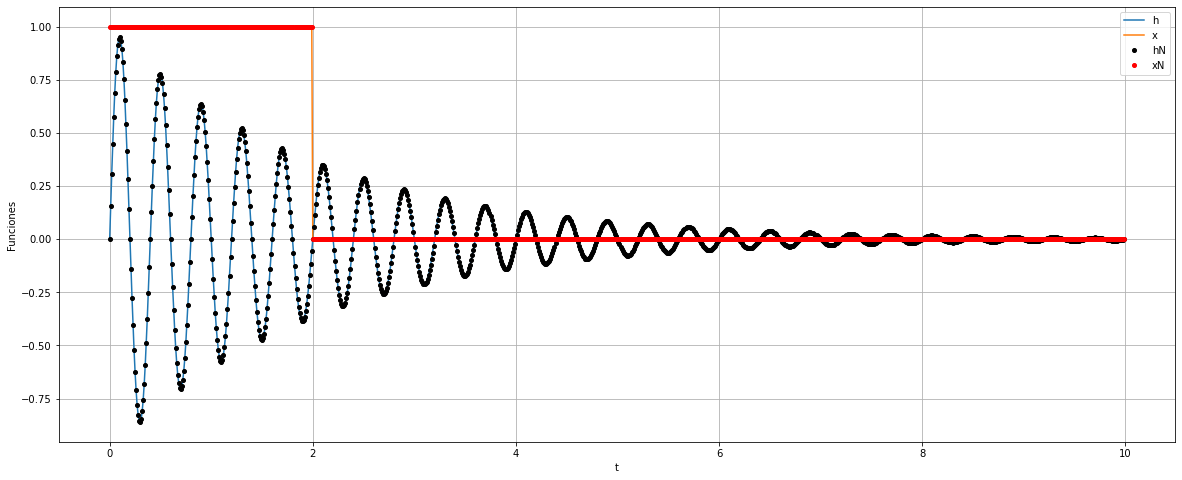

In [58]:
Fs = 100

t = np.arange(0,10,1/Fs)
u = lambda t: np.piecewise (t, [t>=0] , [lambda t: 1, lambda t: 0]) 

a = 1/2
F = 2.5

h = np.exp(-a*t)*np.sin(2*np.pi*F*t)*u(t)
x = lambda t: np.piecewise (t, [(0<=t)&(t<2)] , [lambda t: 1, lambda t: 0]) 


n = t*Fs

hN = np.exp(-a*n/Fs)*np.sin(2*np.pi*F*n/Fs)*u(n/Fs)
xN = lambda n: np.piecewise (n, [(0<=n)&(n<2*Fs)] , [lambda n: 1, lambda n: 0]) 

plt.figure (figsize =(20,8))
plt.plot (t,h)
plt.plot (t,x(t))
plt.plot (n/Fs,hN,"ko",ms=4)
plt.plot (n/Fs,xN(n),"ro",ms=4)
plt.xlabel ("t")
plt.ylabel ("Funciones")
plt.legend(('h','x',"hN","xN"))
plt.grid (True)
plt.show ()

- - - 

### Apartado 2

In [59]:
y = np.convolve(xN(n), hN) # Calculamos la convolución
ny0 = n[0] + n[0] #La convolución empieza en la suma de los comienzos
Ny = len(n) + len(n) - 1 #Suma de longitudes - 1: Número de elementos del vector
ny = np.arange(ny0, ny0+Ny)

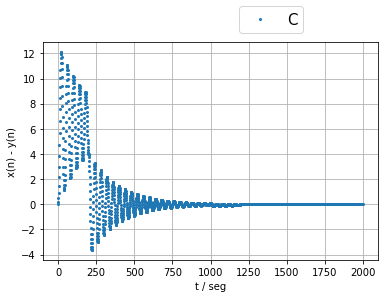

In [60]:
plt.plot(ny, y,"o",ms=2)
plt.xlabel('t / seg')
plt.ylabel('x(n) - y(n)')
plt.legend(('Convolución'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid (True)
plt.show()

<img title="a title" alt="Alt text" src="Imagenes/Captura de Pantalla 2022-10-03 a la(s) 16.12.19.png">

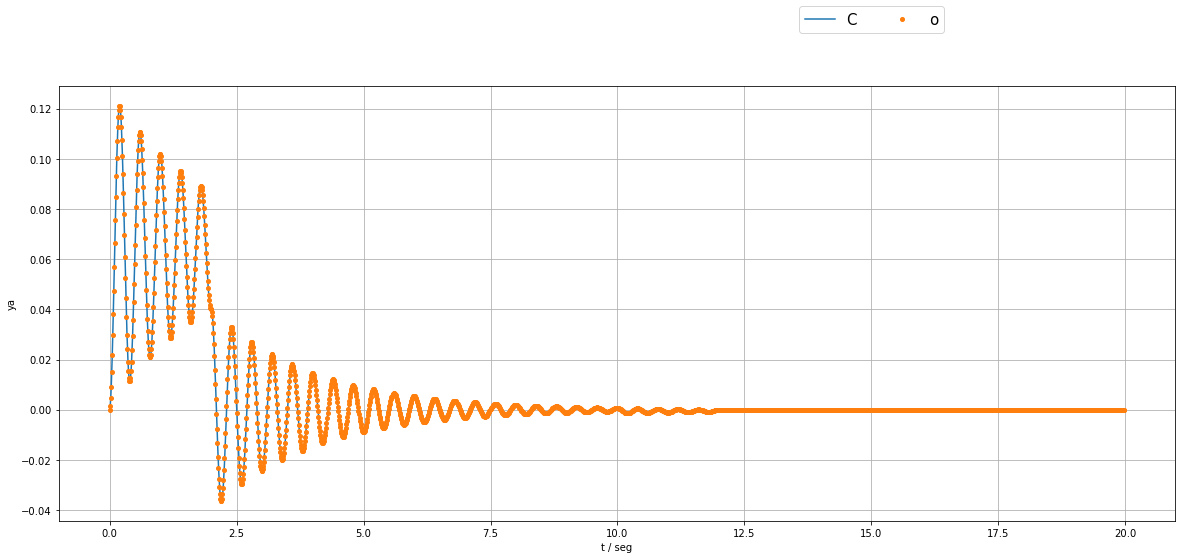

In [80]:
O = F*2*np.pi

ya=np.piecewise(t,[(0<=t)&(t<2),t>=2,t<0],[lambda t:O/(O**2+a**2)*(1-np.exp(-a*t)*(np.cos(2*np.pi*F*t)-a/O*np.sin(2*np.pi*F*t))),lambda t:O/(O**2+a**2)*np.exp(-a*t)*(-np.cos(2*np.pi*F*t)-a/O*np.sin(2*np.pi*F*t)+np.exp(2*a)*(np.cos(2*np.pi*F*(t-2))+a/O*np.sin(2*np.pi*F*(t-2)))),lambda t:0])

plt.figure (figsize =(20,8))
plt.plot(t, ya)
plt.plot(ny/Fs, y/Fs,"o",ms=4)
plt.xlabel('t / seg')
plt.ylabel('ya')
plt.legend(('Convolución'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid (True)
plt.show()

- - -